# Data Science Course Final Project: Personality Type Prediction (MBTI)
# Fullname: Fateme Taroodi


(MBTI) Myers-Briggs Personality Type Prediction

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

* Introversion (I) – Extroversion (E)
* Intuition (N) – Sensing (S)
* Thinking (T) – Feeling (F)
* Judging (J) – Perceiving (P)


So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

From scientific or psychological perspective it is based on the work done on cognitive functions by Carl Jung i.e. Jungian Typology. This was a model of 8 distinct functions, thought processes or ways of thinking that were suggested to be present in the mind. Later this work was transformed into several different personality systems to make it more accessible, the most popular of which is of course the MBTI.

## Importing Required Libraries

In [36]:
import os
import time
from tqdm import tqdm
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")
from sklearn.model_selection import train_test_split, StratifiedKFold
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if hasattr(X, "toarray"):
            return X.toarray()
        if isinstance(X, np.matrix):
            return np.asarray(X)
        return np.asarray(X)

from joblib import dump, load
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T.N\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\T.N\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\T.N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\T.N\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\T.N\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\T.N\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tag

## Reading Dataset and Preprocessing



This dataset contains over 8600 rows of data, on each row is a person’s:
* Type (This persons 4 letter MBTI code/type)
* A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

In [3]:
df = pd.read_csv('data/mbti_1.csv')

In [4]:
df.head(5)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
df.shape

(8675, 2)

In [ ]:
# splitting data into training and holdout dataset
personality_data, df_holdout = train_test_split(
    df, random_state=42, test_size=0.01, stratify=df["type"]
)

In [8]:
# saving the training and holdout datasets
personality_data.to_csv(os.path.join("data", "personality_data.csv"), index=False)
df_holdout.to_csv(os.path.join("data", "df_holdout.csv"), index=False)

In [9]:
print(personality_data["type"].value_counts())
print(df_holdout["type"].value_counts())

type
INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: count, dtype: int64
type
INFP    18
INFJ    15
INTP    13
INTJ    11
ENFP     7
ENTP     7
ISFP     3
ISTP     3
ISFJ     2
ENFJ     2
ENTJ     2
ISTJ     2
ESTP     1
ESFP     1
Name: count, dtype: int64


In [10]:
personality_data = pd.read_csv('data/personality_data.csv')

In [11]:
personality_data.head(5)

,type,posts
0,INFJ,'When asked of the things you wish you did ear...
1,INFJ,'I love both and they are equally important to...
2,INFJ,Really? You think implying that everyone who i...
3,ENFJ,'Love is a crazy thing. Se is our best form ...
4,INTP,'I am a physics undergrad with a computation e...


In [12]:
personality_data.shape

(8588, 2)

### Checking for missing values

In [13]:
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

There is no missing values in this dataset.

### Checking for Class Imbalance

In [14]:
personality_data["type"].value_counts()

type
INFP    1814
INFJ    1455
INTP    1291
INTJ    1080
ENTP     678
ENFP     668
ISTP     334
ISFP     268
ENTJ     229
ISTJ     203
ENFJ     188
ISFJ     164
ESTP      88
ESFP      47
ESFJ      42
ESTJ      39
Name: count, dtype: int64

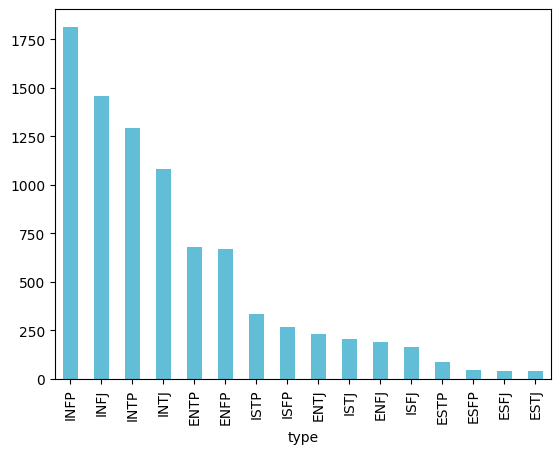

In [15]:
personality_data["type"].value_counts().plot(kind="bar", color="#61BED6")
plt.show()

**Handling Class Imbalance**

To handle the class imbalance better, I will convert the 16 classes into 4 more balanced classes.

In [16]:
personality_data["is_Extrovert"] = personality_data["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
personality_data["is_Sensing"] = personality_data["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
personality_data["is_Thinking"] = personality_data["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
personality_data["is_Judging"] = personality_data["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

* Extroversion vs. Introversion
    * I - 0
    * E - 1
    
* Sensing vs. Intuition
    * N - 0
    * S - 1
    
* Thinking vs. Feeling
    * F - 0
    * T - 1
    
* Judging vs. Perceiving
    * P - 0
    * J - 1

In [17]:
personality_data = personality_data[
    ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
]

In [18]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...


In [19]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [20]:
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 6609
Extrovert Count: 1979
Intuition Count: 7403
Sensing Count: 1185
Feeling Count: 4646
Thinking Count: 3942
Perceiving Count: 5188
Judging Count: 3400


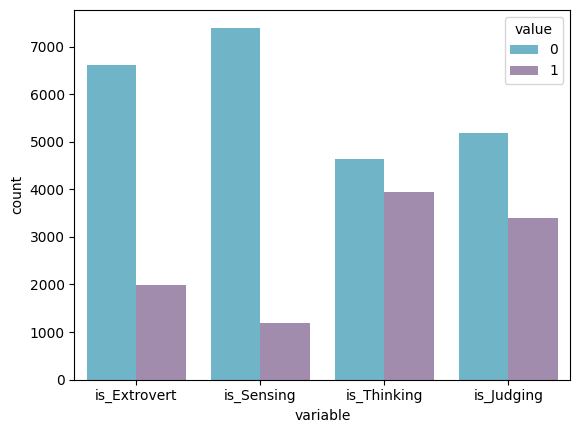

In [21]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]]
    ),
    palette=["#61BED6", "#A386B4"],
)

plt.show()

The class imbalance issue still seem to exist but we will proceed with this for now.

### Checking for the correlations

In [22]:
corr = personality_data[
    ["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]
].corr()

In [23]:
corr

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
is_Extrovert,1.000000,-0.045755,0.069701,-0.161417
is_Sensing,-0.045755,1.000000,0.081352,-0.014597
is_Thinking,0.069701,0.081352,1.000000,-0.004607
is_Judging,-0.161417,-0.014597,-0.004607,1.000000


There does not seem to be any strong correlation between the four personality dimenions.

### Data Cleaning

Converting posts into lower case:

In [24]:
personality_data["clean_posts"] = personality_data["posts"].str.lower()

Replacing ||| with space:

In [25]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(r"\|\|\|", " ", regex=True)

In [26]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"https?:\/\/(www)?\.?([A-Za-z_0-9-]+)([\S])*", "", regex=True
)

In [27]:
# dropping emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"\S+@\S+", "", regex=True
)

In [28]:
# dropping punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"[^a-z\s]", " ", regex=True
)

In [29]:
# dropping MBTIs mentioned in the posts.
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), ""
    )

In [30]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,when asked of the things you wish you did ear...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,i love both and they are equally important to...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really you think implying that everyone who i...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love is a crazy thing se is our best form ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,i am a physics undergrad with a computation e...


### Lemmitizing

In [31]:
t = time.time()

lemmatizer = WordNetLemmatizer()

personality_data["clean_posts"] = personality_data["clean_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)

print(f"Lemmitizing Time: {time.time() - t} seconds")

Lemmitizing Time: 5299.935577392578 seconds


**Removing words that are 1 to 2 characters long**

In [32]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"\b\w{1,2}\b", "", regex=True
)

In [33]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...


In [34]:
personality_data.shape

(8588, 7)

### Saving the clean and lemmitized dataset

In [35]:
personality_data.to_csv(os.path.join("data", "clean_data_1.csv"), index=False)

## Sentiment Analysis and Part of Speech Tagging

### Feature Engineering

In [73]:
# reading the clean_dataset_1
personality_data = pd.read_csv(os.path.join("data", "clean_data_1.csv"))

In [74]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...


In [75]:
personality_data.shape

(8588, 7)

#### Checking for missing values

In [76]:
personality_data.isnull().sum()

type            0
is_Extrovert    0
is_Sensing      0
is_Thinking     0
is_Judging      0
posts           0
clean_posts     0
dtype: int64

### Sentiments Analysis Score

Sentiment scoring for each user:

In [77]:
t = time.time()

analyzer = SentimentIntensityAnalyzer()

nlp_sentiment_score = []

for post in personality_data["clean_posts"]:
    score = analyzer.polarity_scores(post)
    nlp_sentiment_score.append(score)

print(f"Sentiment Scoring Time: {time.time() - t:.2f} seconds")

Sentiment Scoring Time: 403.97 seconds


Segregating the indiviual sentiment scores - compound, positive, negative and neutral

In [78]:
personality_data["compound_sentiment"] = [
    score["compound"] for score in nlp_sentiment_score
]
personality_data["pos_sentiment"] = [score["pos"] for score in nlp_sentiment_score]
personality_data["neg_sentiment"] = [score["neg"] for score in nlp_sentiment_score]
personality_data["neu_sentiment"] = [score["neu"] for score in nlp_sentiment_score]

Sentiment scores have negative values that Naive Bayes can't handle. So I will scale them.

In [80]:
min_max_scaler = MinMaxScaler()
personality_data["compound_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["compound_sentiment"]).reshape(-1, 1)
)
personality_data["pos_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["pos_sentiment"]).reshape(-1, 1)
)
personality_data["neg_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neg_sentiment"]).reshape(-1, 1)
)
personality_data["neu_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neu_sentiment"]).reshape(-1, 1)
)

In [81]:
personality_data.isnull().sum()

type                  0
is_Extrovert          0
is_Sensing            0
is_Thinking           0
is_Judging            0
posts                 0
clean_posts           0
compound_sentiment    0
pos_sentiment         0
neg_sentiment         0
neu_sentiment         0
dtype: int64

### Part of Speech Tagging

Creating tag_posts column that will have each post as a separate list in a row.

In [82]:
# replacing urls with domain name
personality_data["tag_posts"] = personality_data["posts"].str.replace(
    r"https?:\/\/(www\.)?([A-Za-z_0-9-]+)([\S])*",
    lambda match: match.group(2),
    regex=True
)

In [83]:
# replacing ||| with space
personality_data["tag_posts"] = [
    post for post in personality_data["tag_posts"].str.split("\|\|\|")
]

In [84]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,neu_sentiment,tag_posts
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.999800,0.418667,0.136150,0.652505,['When asked of the things you wish you did ea...
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.999950,0.600000,0.134585,0.506536,['I love both and they are equally important t...
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.995499,0.353333,0.297340,0.594771,[Really? You think implying that everyone who ...
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.999700,0.436000,0.262911,0.550109,['Love is a crazy thing. Se is our best form...
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.999700,0.424000,0.172144,0.623094,['I am a physics undergrad with a computation ...


Parts of speech tagging for each word:

In [85]:
t = time.time()

personality_data["tagged_words"] = personality_data["tag_posts"].apply(
    lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x]
)

print(f"POS Tagging Time: {time.time() - t} seconds")

POS Tagging Time: 835.8609647750854 seconds


In [91]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,neu_sentiment,tag_posts,tagged_words
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.999800,0.418667,0.136150,0.652505,['When asked of the things you wish you did ea...,"[[('When, POS), (asked, VBN), (of, IN), (the, ..."
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.999950,0.600000,0.134585,0.506536,['I love both and they are equally important t...,"[[(', POS), (I, PRP), (love, VBP), (both, DT),..."
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.995499,0.353333,0.297340,0.594771,[Really? You think implying that everyone who ...,"[[(Really, RB), (?, .), (You, PRP), (think, VB..."
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.999700,0.436000,0.262911,0.550109,['Love is a crazy thing. Se is our best form...,"[[('Love, ''), (is, VBZ), (a, DT), (crazy, JJ)..."
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.999700,0.424000,0.172144,0.623094,['I am a physics undergrad with a computation ...,"[[(', POS), (I, PRP), (am, VBP), (a, DT), (phy..."


In [93]:
# creating list of unique POS tags
tag_set = set()

for idx, data in personality_data["tagged_words"].items():
    if not isinstance(data, list) or len(data) == 0:
        continue
    for tup in data[0]:
        if isinstance(tup, (list, tuple)) and len(tup) >= 2:
            tag_set.add(tup[1])

tag_list = list(tag_set)

Calculating mean and standard deviation of pos tags for each user:

In [95]:
t = time.time()

def pos_cat(x, tag):
    return [len([y for y in line if y[1] == tag]) for line in x]

for col in tag_list:
    personality_data["POS_" + col + "_mean"] = personality_data["tagged_words"].apply(
        lambda x: np.mean(pos_cat(x, col))
    )
    personality_data["POS_" + col + "_std"] = personality_data["tagged_words"].apply(
        lambda x: np.std(pos_cat(x, col))
    )

print(f"POS Stats Time: {time.time() - t} seconds")

POS Stats Time: 162.6002321243286 seconds


Grouping pos tags based on stanford list:

In [96]:
tags_dict = {
    "ADJ": ["JJ", "JJR", "JJS"],
    "ADP": ["EX", "TO"],
    "ADV": ["RB", "RBR", "RBS", "WRB"],
    "CONJ": ["CC", "IN"],
    "DET": ["DT", "PDT", "WDT"],
    "NOUN": ["NN", "NNS", "NNP", "NNPS"],
    "NUM": ["CD"],
    "PRT": ["RP"],
    "PRON": ["PRP", "PRP$", "WP", "WP$"],
    "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
    "X": ["FW", "LS", "UH"],
}

In [97]:
# Stanford POS tag stats
t = time.time()

def stanford_tag(x, tag):
    tags_list = [len([y for y in line if y[1] in tags_dict[col]]) for line in x]
    return tags_list

for col in tags_dict.keys():
    personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
        lambda x: np.median(stanford_tag(x, col))
    )

print(f"Stanford POS Stats Time: {time.time() - t} seconds")

Stanford POS Stats Time: 36.12651324272156 seconds


In [98]:
personality_data.head(2)

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,ADV_avg,CONJ_avg,DET_avg,NOUN_avg,NUM_avg,PRT_avg,PRON_avg,VERB_avg,._avg,X_avg
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.99980,0.418667,0.136150,...,4.0,5.0,3.0,6.0,0.0,0.0,4.0,8.0,5.0,0.0
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.99995,0.600000,0.134585,...,3.0,5.0,2.0,5.0,0.0,0.0,5.0,8.0,3.0,0.0


Saving the scored & tagged file:

In [99]:
personality_data.to_csv(os.path.join("data", "clean_data_2.csv"), index=False)

## Counting and Vectorizing

**Reading the dataset from previous part**

In [100]:
personality_data = pd.read_csv(os.path.join("data", "clean_data_2.csv"))

In [101]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,ADV_avg,CONJ_avg,DET_avg,NOUN_avg,NUM_avg,PRT_avg,PRON_avg,VERB_avg,._avg,X_avg
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.999800,0.418667,0.136150,...,4.0,5.0,3.0,6.0,0.0,0.0,4.0,8.0,5.0,0.0
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.999950,0.600000,0.134585,...,3.0,5.0,2.0,5.0,0.0,0.0,5.0,8.0,3.0,0.0
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.995499,0.353333,0.297340,...,2.0,3.0,2.0,5.0,0.0,0.0,4.0,7.0,4.0,0.0
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.999700,0.436000,0.262911,...,3.0,4.0,2.5,6.0,0.0,0.0,5.0,7.5,5.0,0.0
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.999700,0.424000,0.172144,...,2.0,4.0,2.0,6.0,0.0,0.0,3.0,5.0,4.0,0.0


In [102]:
personality_data.shape

(8588, 115)

### Feature Engineering

#### Question, Exclamation, Colon and Emoji Count

In [103]:
def unique_words(s):
    unique = set(s.split(" "))
    return len(unique) / 50


def emojis(post):
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count / 50


def colons(post):
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count / 50

In [104]:
personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?") / 50)
personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!") / 50)
personality_data["colons"] = personality_data["posts"].apply(colons)
personality_data["emojis"] = personality_data["posts"].apply(emojis)

#### Word Count

In [105]:
personality_data["word_count"] = personality_data["posts"].apply(
    lambda s: (s.count(" ") + 1) / 50
)
personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

#### Word Stats

In [106]:
t = time.time()

personality_data["post_length_var"] = personality_data["posts"].apply(
    lambda x: np.var([len(post.split()) for post in x.split("|||")])
)

print(f"Time Taken: {time.time() - t}")

Time Taken: 1.7382373809814453


#### Upper Case Count

In [107]:
personality_data["upper"] = personality_data["posts"].apply(
    lambda x: len([x for x in x.split() if x.isupper()]) / 50
)

#### Link Count

In [108]:
personality_data["link_count"] = personality_data["posts"].apply(
    lambda s: s.count("http") / 50
)

#### Ellipses Count

In [ ]:
ellipses_count = [
    len(re.findall(r"\.\.\.\ ", posts)) / 50 for posts in personality_data["posts"]
]
personality_data["ellipses"] = ellipses_count

#### Image Count

In [110]:
personality_data["img_count"] = [
    len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post)) / 50
    for post in personality_data["posts"]
]

In [111]:
personality_data.head(2)

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.99980,0.418667,0.136150,...,0.22,0.32,0.08,30.98,14.92,78.414931,1.46,0.04,0.62,0.0
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.99995,0.600000,0.134585,...,0.36,0.14,0.00,28.58,12.72,160.744400,1.62,0.02,0.04,0.0


In [112]:
personality_data.dtypes

type                object
is_Extrovert         int64
is_Sensing           int64
is_Thinking          int64
is_Judging           int64
                    ...   
post_length_var    float64
upper              float64
link_count         float64
ellipses           float64
img_count          float64
Length: 126, dtype: object

In [113]:
personality_data.isnull().sum()

type               0
is_Extrovert       0
is_Sensing         0
is_Thinking        0
is_Judging         0
                  ..
post_length_var    0
upper              0
link_count         0
ellipses           0
img_count          0
Length: 126, dtype: int64

In [114]:
personality_data.to_csv(os.path.join("data", "clean_data_3.csv"), index=False)

### Vectorize

In [116]:
# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=25, max_df=0.8)
tfidf_words = tfidf_vectorizer.fit_transform(personality_data["clean_posts"])

tfidf_vectorized_data = pd.DataFrame(
    tfidf_words.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

In [117]:
tfidf_vectorized_data.head()

,aback,abandon,abandoned,abandoning,abandonment,abbey,abbreviation,abhor,abide,ability,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# Saving the TF-IDF vectorized data
tfidf_vectorized_data.to_csv(os.path.join("data", "tfidf_vectorized_data.csv"), index=False)

In [120]:
# Using CountVectorizer
count_vectorizer = CountVectorizer(decode_error="ignore", min_df=25, max_df=0.8,)
count_words = count_vectorizer.fit_transform(personality_data["clean_posts"])

count_vectorized_data = pd.DataFrame(
    data=count_words.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)

In [121]:
count_vectorized_data.head()

,aback,abandon,abandoned,abandoning,abandonment,abbey,abbreviation,abhor,abide,ability,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Saving the Count vectorized data
count_vectorized_data.to_csv(os.path.join("data", "count_vectorized_data.csv"), index=False)

## EDA and Visualization

In [ ]:
nt = "#61BED6"
nf = "#A386B4"
sj = "#56AC8A"
sp = "#DFC10C"

colors_d = {
    "ENTP": nt,
    "INTP": nt,
    "INTJ": nt,
    "ENTJ": nt,
    "INFJ": nf,
    "ENFJ": nf,
    "INFP": nf,
    "ENFP": nf,
    "ISFJ": sj,
    "ISTJ": sj,
    "ESTJ": sj,
    "ESFJ": sj,
    "ISFP": sp,
    "ISTP": sp,
    "ESTP": sp,
    "ESFP": sp,
}

In [124]:
personality_data = pd.read_csv(os.path.join("data", "clean_data_3.csv"))

### Word Clouds

Creating word clouds for each of the 16 personality types:

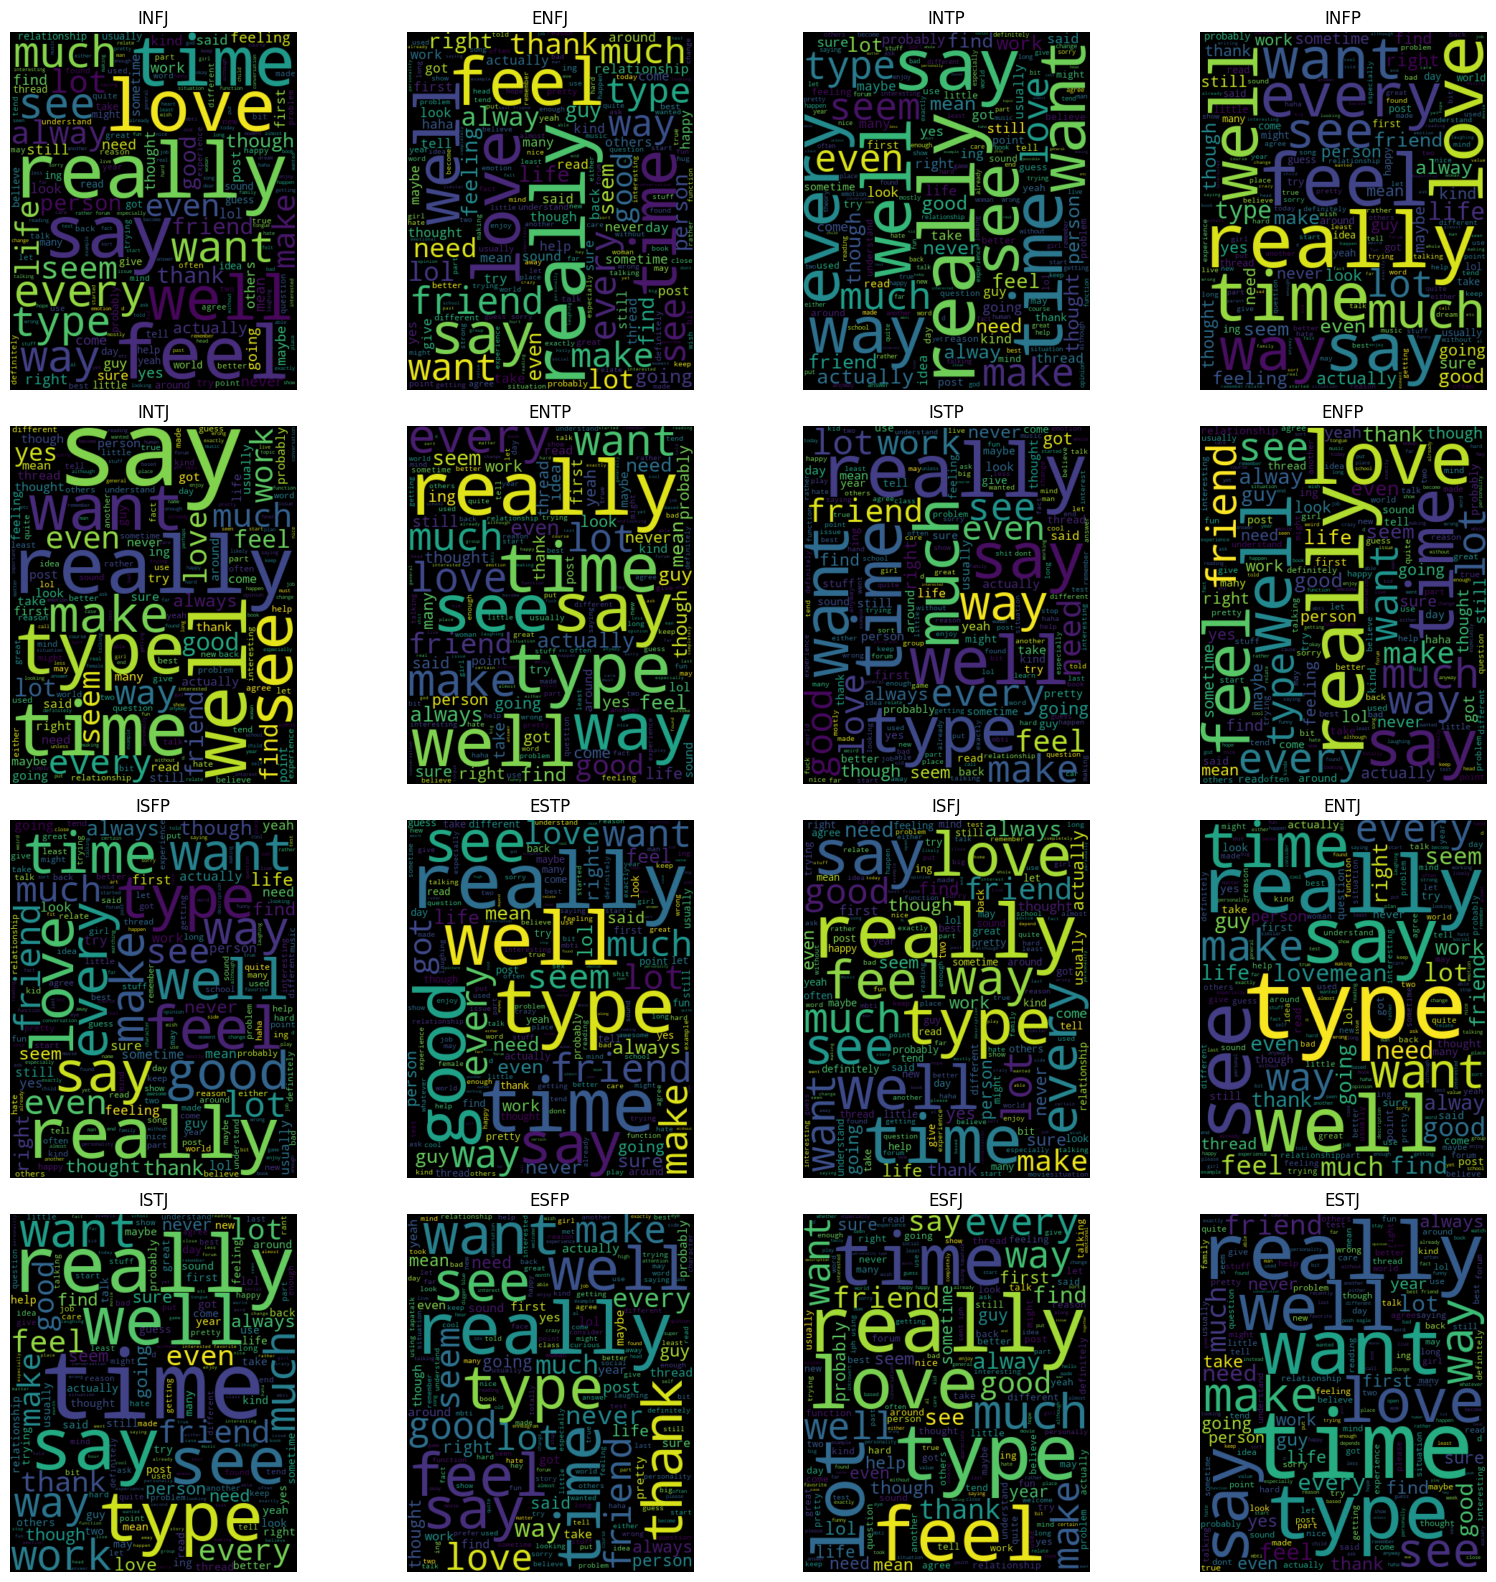

In [125]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax = ax.ravel()

for i, mbti_type in enumerate(personality_data["type"].unique()):
    wordcloud_words = " ".join(
        [
            re.sub(r"(people)|(think)|(know)|(thing)|(one)", "", user_posts,)
            for user_posts in personality_data[personality_data["type"] == mbti_type][
                "clean_posts"
            ]
        ]
    )

    wordcloud = WordCloud(height=500).generate(wordcloud_words)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(mbti_type)

### Counts

#### Word Count by Type

<Axes: xlabel='word_count', ylabel='type'>

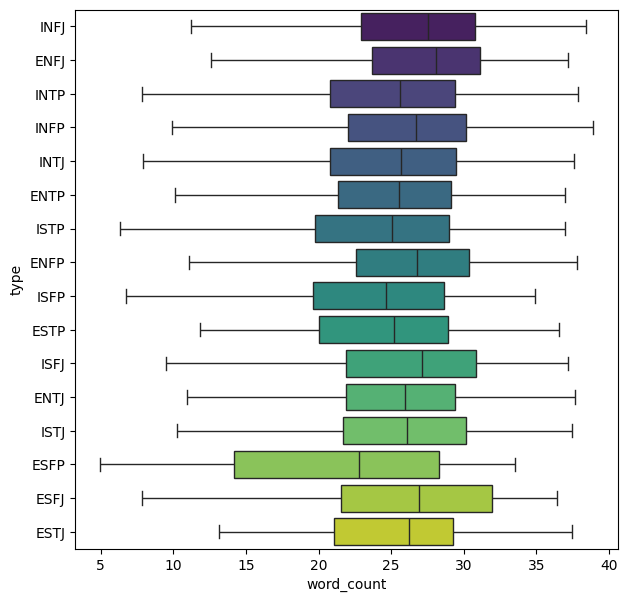

In [138]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="word_count", data=personality_data, showfliers=False, palette='viridis')

#### Compound Sentiment Score by Type

<Axes: xlabel='compound_sentiment', ylabel='type'>

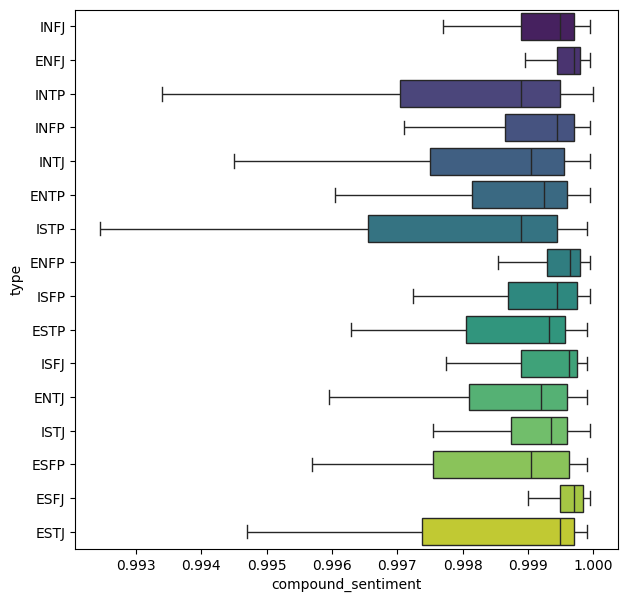

In [139]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="compound_sentiment", data=personality_data, showfliers=False, palette='viridis')

#### Positive Sentiment Score by Type

<Axes: xlabel='pos_sentiment', ylabel='type'>

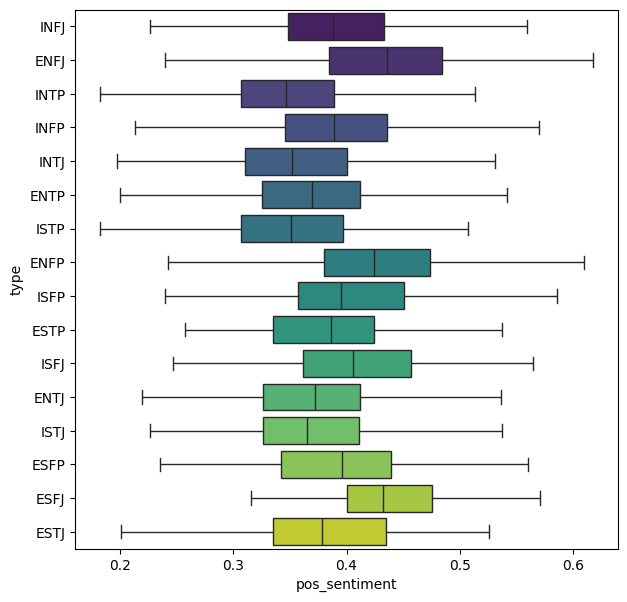

In [140]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="pos_sentiment", data=personality_data, showfliers=False, palette='viridis')

#### Negative Sentiment Score by Type

<Axes: xlabel='neg_sentiment', ylabel='type'>

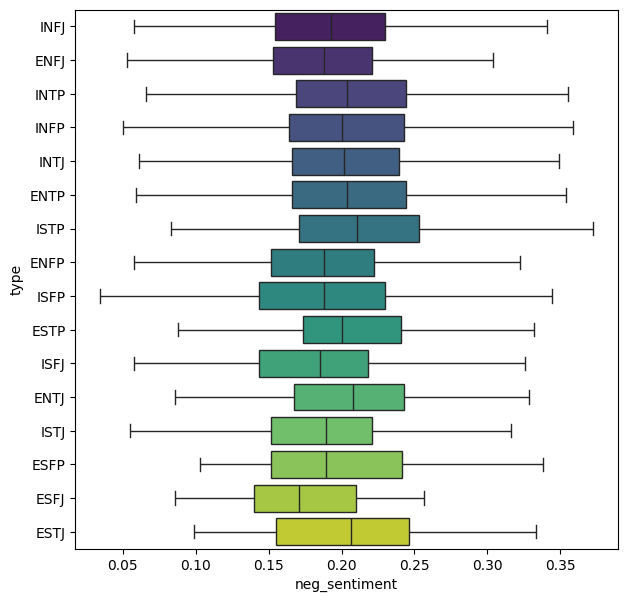

In [141]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neg_sentiment", data=personality_data, showfliers=False, palette='viridis')

#### Neutral Sentiment Score by Type

<Axes: xlabel='neu_sentiment', ylabel='type'>

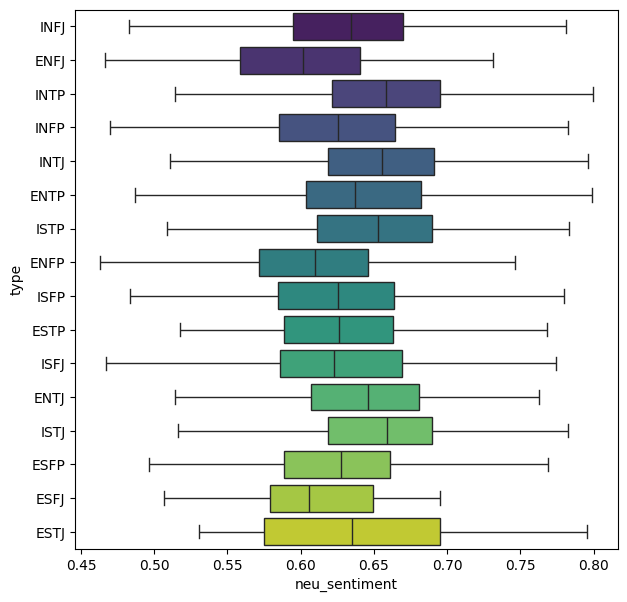

In [142]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="neu_sentiment", data=personality_data, showfliers=False, palette='viridis')

#### Question Marks by Type

<Axes: xlabel='qm', ylabel='type'>

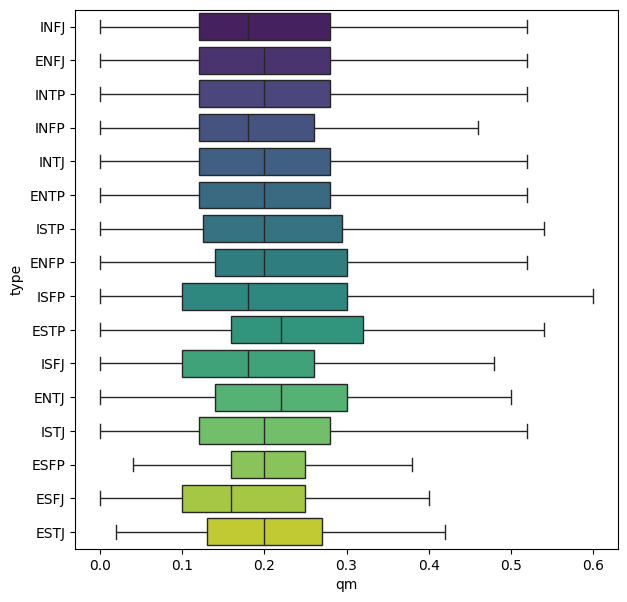

In [143]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="qm", data=personality_data, showfliers=False, palette='viridis')

#### Exclamation by Type

<Axes: xlabel='em', ylabel='type'>

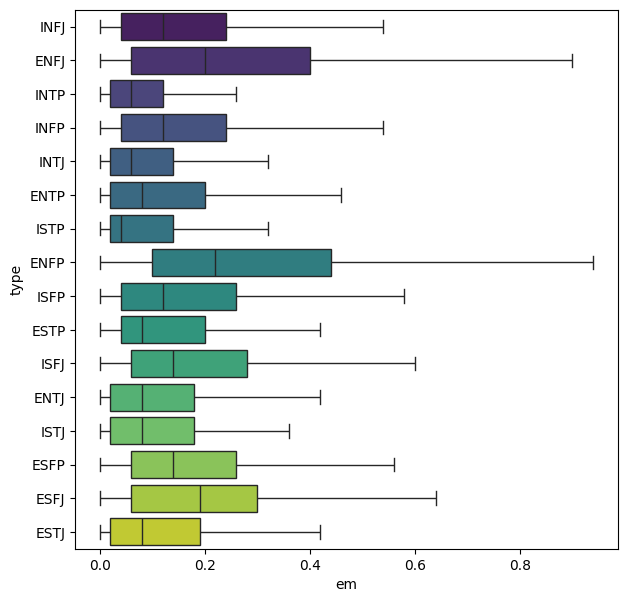

In [144]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="em", data=personality_data, showfliers=False, palette='viridis')

#### Colons by Type

<Axes: xlabel='colons', ylabel='type'>

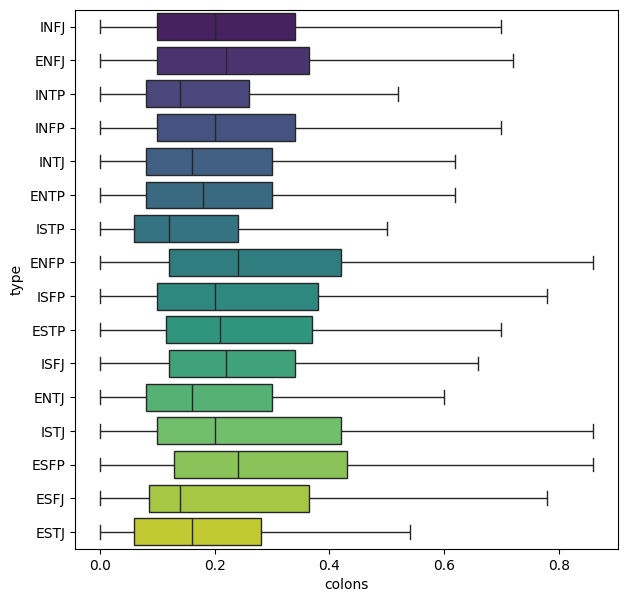

In [145]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="colons", data=personality_data, showfliers=False, palette='viridis')

#### Emojis by Type

<Axes: xlabel='emojis', ylabel='type'>

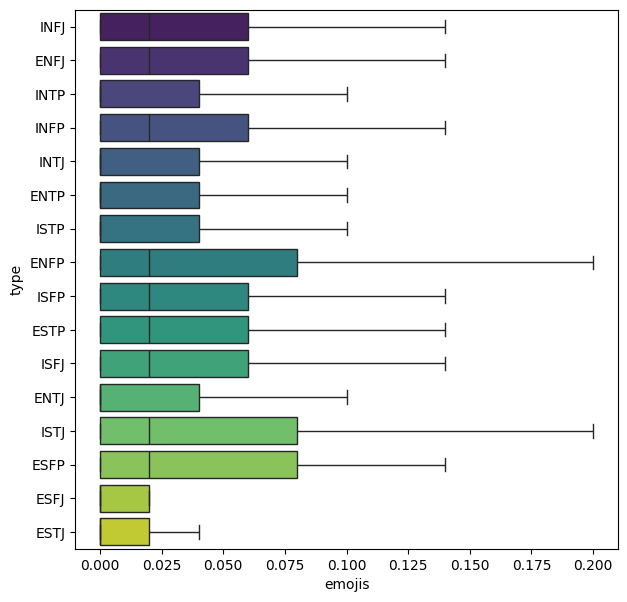

In [146]:
plt.figure(figsize=(7, 7))
sns.boxplot(y="type", x="emojis", data=personality_data, showfliers=False, palette='viridis')

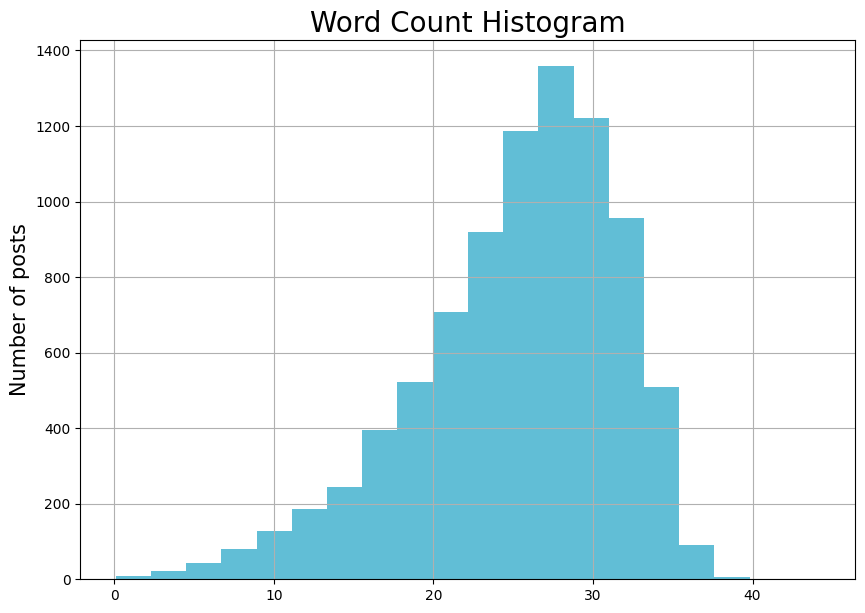

In [147]:
plt.figure(figsize=(10, 7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
personality_data["word_count"].hist(bins=20, color=nt)
plt.show()

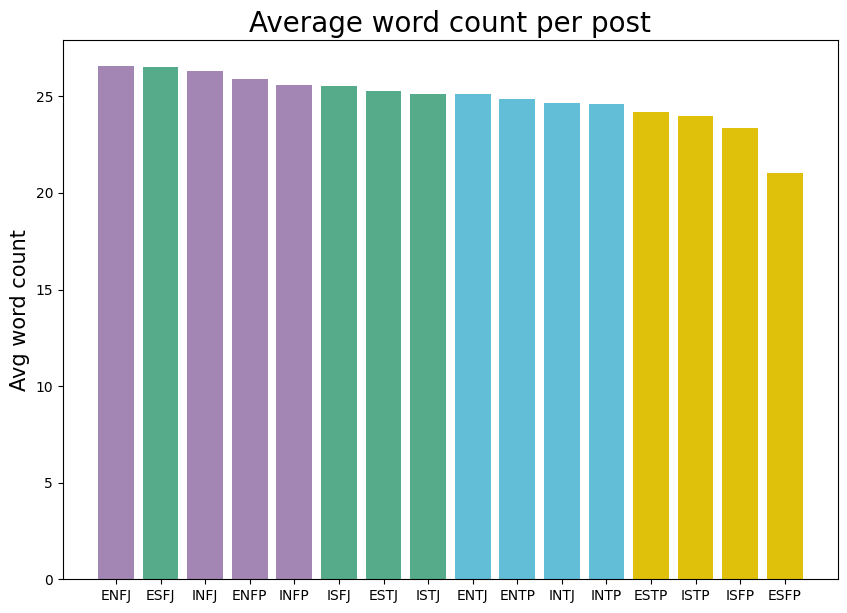

In [148]:
avg_words_type = (
    personality_data.groupby("type")
    .agg({"word_count": "mean"})
    .sort_values("word_count", ascending=False)
)
colors = {x: colors_d[x] for x in avg_words_type.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Average word count per post", fontsize=20)
plt.ylabel("Avg word count", fontsize=15)
plt.bar(avg_words_type.index, avg_words_type["word_count"], color=list(colors.values()))
plt.show()

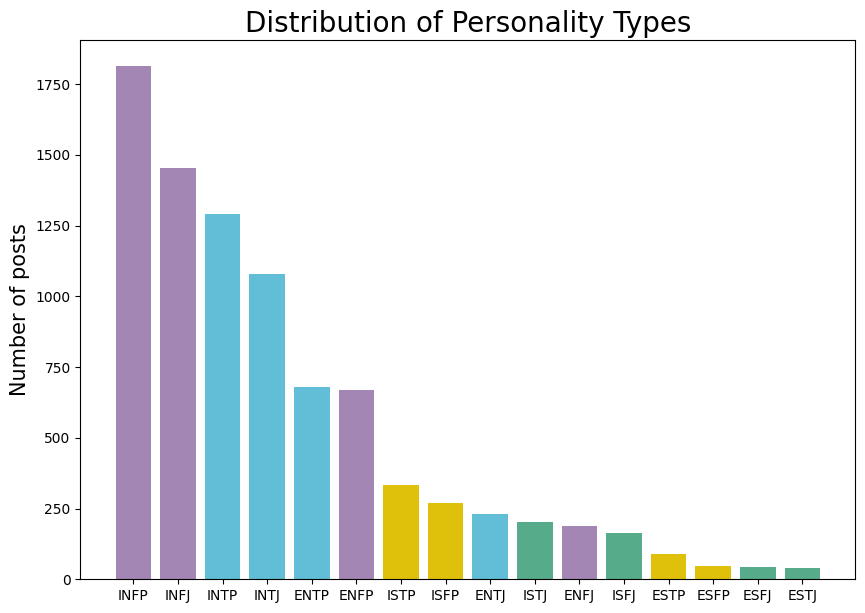

In [149]:
mb = (
    personality_data.groupby("type")
    .agg({"type": "count"})
    .rename(columns={"type": "count"})
    .sort_values("count", ascending=False)
)
colors = {x: colors_d[x] for x in mb.index.tolist()}
plt.figure(figsize=(10, 7))
plt.title("Distribution of Personality Types", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.bar(mb.index, mb["count"], color=list(colors.values()))
plt.show()

## Machine Learning - Implementing Different Classifier Models

In [2]:
# reading the final dataset
personality_data = pd.read_csv('data/clean_data_3.csv')

In [3]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,em,colons,emojis,word_count,unique_words,post_length_var,upper,link_count,ellipses,img_count
0,INFJ,0,0,0,1,'When asked of the things you wish you did ear...,asked thing wish earlier find answering...,0.999800,0.418667,0.136150,...,0.22,0.32,0.08,30.98,14.92,78.414931,1.46,0.04,0.62,0.00
1,INFJ,0,0,0,1,'I love both and they are equally important to...,love equally important music window soul in...,0.999950,0.600000,0.134585,...,0.36,0.14,0.00,28.58,12.72,160.744400,1.62,0.02,0.04,0.00
2,INFJ,0,0,0,1,Really? You think implying that everyone who i...,really think implying everyone entrepreneur s...,0.995499,0.353333,0.297340,...,0.10,0.50,0.20,22.28,11.76,176.249600,1.30,0.06,0.04,0.04
3,ENFJ,1,0,0,1,'Love is a crazy thing. Se is our best form ...,love crazy thing best form communication ...,0.999700,0.436000,0.262911,...,0.00,0.00,0.00,34.36,15.38,83.520000,2.10,0.02,0.18,0.00
4,INTP,0,0,1,0,'I am a physics undergrad with a computation e...,physic undergrad computation emphasis learni...,0.999700,0.424000,0.172144,...,0.48,0.14,0.00,23.90,12.66,152.750400,1.70,0.50,0.00,0.04


### Setting model variables and target variable

In [4]:
# setting X to clean_posts, compound sentiment score, pos tags and various other counts
X = personality_data[
    [
        "clean_posts",
        "compound_sentiment",
        "ADJ_avg",
        "ADP_avg",
        "ADV_avg",
        "CONJ_avg",
        "DET_avg",
        "NOUN_avg",
        "NUM_avg",
        "PRT_avg",
        "PRON_avg",
        "VERB_avg",
        "qm",
        "em",
        "colons",
        "emojis",
        "word_count",
        "unique_words",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
    ]
]

# setting y to four target classes -> is_Extrovert, is_Sensing, is_Thinking, is_Judging
y = personality_data.iloc[:, 1:5]

In [5]:
print(X.shape)
print(y.shape)

(8588, 22)
(8588, 4)


### Creating a list of words (other than the stop words) to be dropped to improve model performanace

In [6]:
additional_stopwords = [
    "hey",
    "hello",
    "briggs",
    "cat",
    "car",
    "mbti",
    "soup",
    "tea",
    "sport",
    "snow",
    "christmas",
]

### Preprocessor for vectorization and selecting best counts and scores

Preprocessing steps for selecting best k columns/features from counts & scores and for vectorizing words:

In [7]:
counts_n_scores = [
    "compound_sentiment",
    "ADJ_avg",
    "ADP_avg",
    "ADV_avg",
    "CONJ_avg",
    "DET_avg",
    "NOUN_avg",
    "NUM_avg",
    "PRT_avg",
    "PRON_avg",
    "VERB_avg",
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]

best_k_features = make_pipeline(MinMaxScaler(), SelectKBest(f_classif, k=10))

Setting up preprocessing for TF-IDF vectorizer:

In [8]:
preprocesser_tf = ColumnTransformer(
    transformers=[
        (
            "tfidf",
            TfidfVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)

Setting up preprocessing for Count vectorizer:

In [9]:
preprocesser_ct = ColumnTransformer(
    transformers=[
        (
            "ct_vect",
            CountVectorizer(min_df=25, max_df=0.85, stop_words=additional_stopwords),
            "clean_posts",
        ),
        ("selectbest", best_k_features, counts_n_scores),
    ],
    remainder="passthrough",
)

### Modeling

Setting up the personality dictionary for printing scores for each class

In [10]:
mbti_type = {
    "is_Extrovert": "Extrovert vs Introvert",
    "is_Sensing": "Sensing vs Intuition",
    "is_Thinking": "Thinking vs Feeling",
    "is_Judging": "Judging vs Perceiving",
}

In [12]:
# function to build the model for predicting each of the 4 target classes
def build_model(model, X, target, vectorizer_name):

    for col in target.columns:

        print(f"\n{mbti_type[col]}")
        target = y[col]

        X_train, X_test, y_train, y_test = train_test_split(
            X, target, test_size=0.2, random_state=42, stratify=target
        )

        # model training
        model.fit(X_train, y_train)

        # y_hat
        y_pred = model.predict(X_test)

        # y_probability
        y_proba = model.predict_proba(X_test)[:, 1]

        # precision recall score
        average_precision = average_precision_score(y_test, y_proba)

        print(
            f"Geometric Mean Score: {geometric_mean_score(y_test, y_pred, average='weighted'):.2f}"
        )
        print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
        print(f"Average Precision-Recall Score: {average_precision:.2f}")
        print(classification_report_imbalanced(y_test, y_pred))

### TF-IDF Logistic Regression

In [14]:
tfidf_logistic_regression = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(tfidf_logistic_regression, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.68
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.47
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.66      0.69      0.76      0.68      0.46      1322
          1       0.38      0.69      0.66      0.49      0.68      0.46       396

avg / total       0.76      0.67      0.69      0.70      0.68      0.46      1718


Sensing vs Intuition
Geometric Mean Score: 0.69
ROC-AUC Score: 0.77
Average Precision-Recall Score: 0.38
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.68      0.70      0.79      0.69      0.47      1481
          1       0.26      0.70      0.68      0.38      0.69      0.48       237

avg / total       0.84      0.68      0.70      0.73      0.69      0.47      1718


Thinking vs Feeling
Geometric Mean Score: 0.79
ROC-AUC Score: 0.87
Average Precision-Recall Score: 0.84
           

### Count Vectorized Logistic Regression

In [15]:
ct_logistic_regression = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(ct_logistic_regression, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.64
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.68      0.60      0.75      0.64      0.41      1322
          1       0.36      0.60      0.68      0.45      0.64      0.41       396

avg / total       0.74      0.66      0.62      0.68      0.64      0.41      1718


Sensing vs Intuition
Geometric Mean Score: 0.68
ROC-AUC Score: 0.74
Average Precision-Recall Score: 0.33
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.65      0.71      0.76      0.68      0.46      1481
          1       0.24      0.71      0.65      0.36      0.68      0.46       237

avg / total       0.84      0.66      0.70      0.71      0.68      0.46      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.82
           

### TF-IDF Logistic Lasso

In [ ]:
tfidf_logistic_regression_lasso = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='saga' )
)

build_model(tfidf_logistic_regression_lasso, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.72
Average Precision-Recall Score: 0.44
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.67      0.64      0.75      0.65      0.43      1322
          1       0.37      0.64      0.67      0.46      0.65      0.43       396

avg / total       0.75      0.66      0.65      0.69      0.65      0.43      1718


Sensing vs Intuition
Geometric Mean Score: 0.70
ROC-AUC Score: 0.77
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.67      0.74      0.78      0.70      0.49      1481
          1       0.26      0.74      0.67      0.39      0.70      0.50       237

avg / total       0.85      0.68      0.73      0.73      0.70      0.49      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.81
           

### Count Vectorized Logistic Lasso

In [17]:
ct_logistic_regression_lasso = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='saga' )
)
build_model(ct_logistic_regression_lasso, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.63
ROC-AUC Score: 0.68
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.65      0.61      0.73      0.63      0.40      1322
          1       0.34      0.61      0.65      0.44      0.63      0.40       396

avg / total       0.73      0.64      0.62      0.67      0.63      0.40      1718


Sensing vs Intuition
Geometric Mean Score: 0.66
ROC-AUC Score: 0.73
Average Precision-Recall Score: 0.31
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.65      0.68      0.76      0.66      0.43      1481
          1       0.23      0.68      0.65      0.35      0.66      0.44       237

avg / total       0.83      0.65      0.67      0.70      0.66      0.43      1718


Thinking vs Feeling
Geometric Mean Score: 0.76
ROC-AUC Score: 0.84
Average Precision-Recall Score: 0.80
           

### TF-IDF Logistic Ridge

In [18]:
tfidf_logistic_regression_ridge = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), LogisticRegressionCV(penalty='l2', solver='saga' )
)
build_model(tfidf_logistic_regression_ridge, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.69
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.47
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.69      0.68      0.77      0.69      0.47      1322
          1       0.40      0.68      0.69      0.50      0.69      0.47       396

avg / total       0.77      0.69      0.68      0.71      0.69      0.47      1718


Sensing vs Intuition
Geometric Mean Score: 0.71
ROC-AUC Score: 0.79
Average Precision-Recall Score: 0.41
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.68      0.74      0.79      0.71      0.50      1481
          1       0.27      0.74      0.68      0.39      0.71      0.50       237

avg / total       0.85      0.68      0.73      0.73      0.71      0.50      1718


Thinking vs Feeling
Geometric Mean Score: 0.79
ROC-AUC Score: 0.87
Average Precision-Recall Score: 0.84
           

### Count Vectorized Logistic Ridge

In [19]:
ct_logistic_regression_ridge = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV(penalty='l2', solver='saga' )
)
build_model(ct_logistic_regression_ridge, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.39
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.67      0.62      0.75      0.65      0.42      1322
          1       0.36      0.62      0.67      0.46      0.65      0.41       396

avg / total       0.74      0.66      0.63      0.68      0.65      0.42      1718


Sensing vs Intuition
Geometric Mean Score: 0.71
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.35
                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.67      0.76      0.79      0.71      0.51      1481
          1       0.27      0.76      0.67      0.40      0.71      0.51       237

avg / total       0.85      0.68      0.75      0.73      0.71      0.51      1718


Thinking vs Feeling
Geometric Mean Score: 0.78
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.82
           

### TF-IDF Support Vector Classifier

In [ ]:
tfidf_svc = imb_make_pipeline(
    preprocesser_tf, RandomUnderSampler(), DenseTransformer(), SVC(kernel='linear',probability=True)
)
build_model(tfidf_svc, X, y, "tfidf")

### Count Vectorized Support Vector Classifier

In [ ]:
ct_svc = imb_make_pipeline(
    preprocesser_ct, DenseTransformer(), RandomUnderSampler(), SVC(kernel='linear',probability=True)
)
build_model(ct_svc, X, y, "ct_vect")

### TF-IDF Naive Bayes

In [24]:
tfidf_nb = imb_make_pipeline(
    preprocesser_tf, DenseTransformer(), RandomUnderSampler(), MultinomialNB(),
)
build_model(tfidf_nb, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.69
ROC-AUC Score: 0.77
Average Precision-Recall Score: 0.47
                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.62      0.78      0.73      0.69      0.47      1322
          1       0.38      0.78      0.62      0.51      0.69      0.49       396

avg / total       0.78      0.65      0.74      0.68      0.69      0.47      1718


Sensing vs Intuition
Geometric Mean Score: 0.71
ROC-AUC Score: 0.78
Average Precision-Recall Score: 0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.69      0.73      0.80      0.71      0.50      1481
          1       0.28      0.73      0.69      0.40      0.71      0.51       237

avg / total       0.85      0.70      0.72      0.74      0.71      0.50      1718


Thinking vs Feeling
Geometric Mean Score: 0.76
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.80
           

### Count Vectorized Naive Bayes

In [25]:
ct_nb = imb_make_pipeline(
    preprocesser_ct, DenseTransformer(), RandomUnderSampler(), MultinomialNB(),
)
build_model(ct_nb, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.69
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.43
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.68      0.71      0.77      0.69      0.48      1322
          1       0.40      0.71      0.68      0.51      0.69      0.48       396

avg / total       0.77      0.69      0.70      0.71      0.69      0.48      1718


Sensing vs Intuition
Geometric Mean Score: 0.69
ROC-AUC Score: 0.78
Average Precision-Recall Score: 0.41
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.66      0.73      0.77      0.69      0.48      1481
          1       0.25      0.73      0.66      0.38      0.69      0.48       237

avg / total       0.84      0.67      0.72      0.72      0.69      0.48      1718


Thinking vs Feeling
Geometric Mean Score: 0.77
ROC-AUC Score: 0.85
Average Precision-Recall Score: 0.79
           

### TF-IDF Random Forest

In [26]:
tfidf_rf = imb_make_pipeline(
    preprocesser_tf, DenseTransformer(),
        RandomUnderSampler(),
        RandomForestClassifier(n_estimators=100, max_depth=10),
)
build_model(tfidf_rf, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.64
ROC-AUC Score: 0.69
Average Precision-Recall Score: 0.38
                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.66      0.62      0.74      0.64      0.41      1322
          1       0.35      0.62      0.66      0.45      0.64      0.40       396

avg / total       0.74      0.65      0.63      0.67      0.64      0.41      1718


Sensing vs Intuition
Geometric Mean Score: 0.62
ROC-AUC Score: 0.69
Average Precision-Recall Score: 0.24
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.62      0.63      0.74      0.62      0.39      1481
          1       0.21      0.63      0.62      0.31      0.62      0.39       237

avg / total       0.82      0.62      0.63      0.68      0.62      0.39      1718


Thinking vs Feeling
Geometric Mean Score: 0.73
ROC-AUC Score: 0.81
Average Precision-Recall Score: 0.77
           

### Count Vectorized Random Forest

In [27]:
ct_rf = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), RandomForestClassifier(n_estimators=100, max_depth=10),
)
build_model(ct_rf, X, y, "ct_vect")


Extrovert vs Introvert
Geometric Mean Score: 0.65
ROC-AUC Score: 0.70
Average Precision-Recall Score: 0.40
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.65      0.65      0.74      0.65      0.42      1322
          1       0.35      0.65      0.65      0.46      0.65      0.42       396

avg / total       0.74      0.65      0.65      0.67      0.65      0.42      1718


Sensing vs Intuition
Geometric Mean Score: 0.66
ROC-AUC Score: 0.71
Average Precision-Recall Score: 0.27
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.61      0.71      0.73      0.66      0.43      1481
          1       0.22      0.71      0.61      0.34      0.66      0.44       237

avg / total       0.83      0.62      0.70      0.68      0.66      0.43      1718


Thinking vs Feeling
Geometric Mean Score: 0.74
ROC-AUC Score: 0.81
Average Precision-Recall Score: 0.76
           

### Final Model - Logistic Regression Ridge with TF-IDF Vectorization

Selecting TF-IDF Logistic Regression Ridge as our final model as it returned the highest scores for all metrics - accuracy, precision, recall, roc-auc, avg_precision_recall as compared to other models.


Extrovert vs Introvert
               coef
word               
fun        3.915537
mind      -3.146846
bored      3.136901
crazy      2.999829
family    -2.944171
let        2.897581
awesome    2.836729
debate     2.744348
business   2.327003
game      -2.310546
nature    -2.283610
guy        2.279241
beautiful -2.231839
inferior  -2.216572
death     -2.181175
quiet     -2.136359
hot        2.135874
dream     -2.113110
dated      2.094859
afraid    -2.083317
ego        2.060988

Sensing vs Intuition
                coef
word                
type        2.931250
idea       -2.716483
rant        2.298893
whatever    2.145750
many       -2.110076
world      -2.069206
last        2.004955
sensor      1.950790
rave        1.931460
inferior    1.896415
fun         1.894604
human      -1.864380
stereotype  1.857690
socionics   1.821297
come        1.815236
also       -1.811112
self       -1.744250
dominant    1.716179
husband     1.715984
sound       1.715618
interest    1.707245

Thinking v

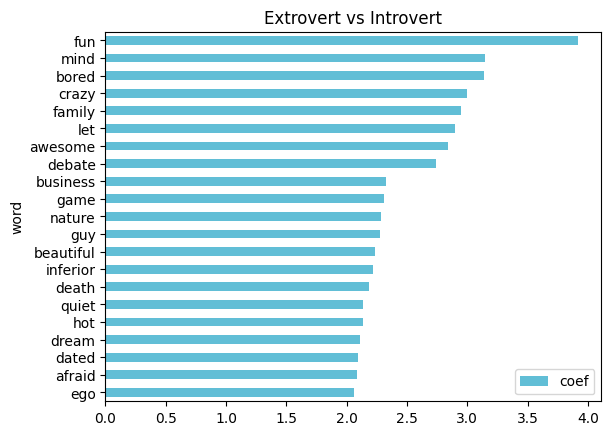

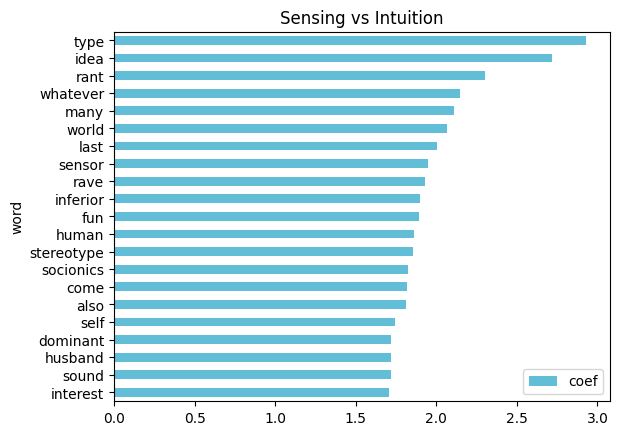

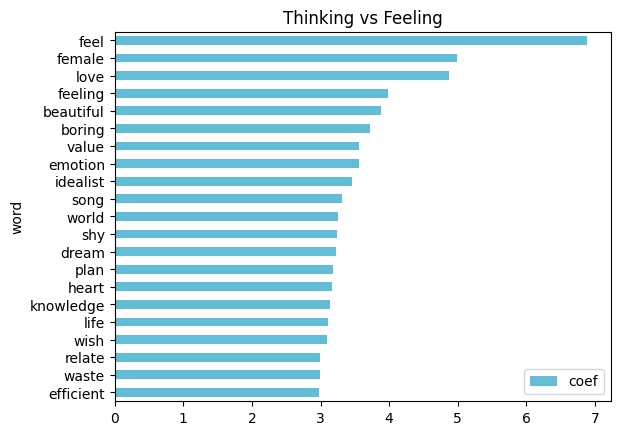

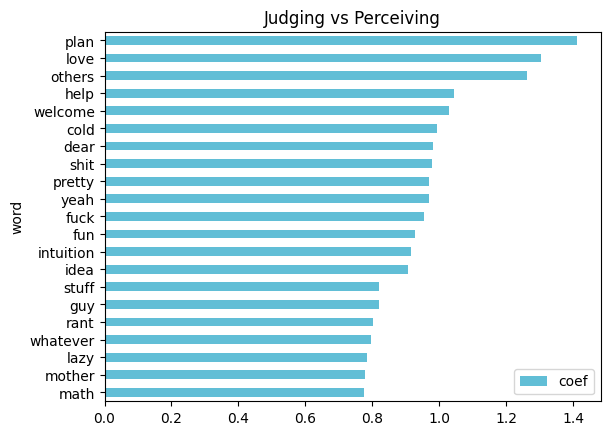

In [29]:
for col in y.columns:
    
    print(f"\n{mbti_type[col]}")

    target = y[col]

    tfidf_logistic_regression_ridge = imb_make_pipeline(
    preprocesser_tf, 
    RandomUnderSampler(), 
    LogisticRegressionCV(penalty='l2', solver='saga' )
    )
    
    # training the data on entire dataset
    tfidf_logistic_regression_ridge.fit(X, target)
    
    # feature importance   
    coef = tfidf_logistic_regression_ridge[-1].coef_[0]  
    word = tfidf_logistic_regression_ridge[0].named_transformers_["tfidf"].get_feature_names_out()
    word_list = list(zip(word, coef))         
    result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")    
    result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:21]
    print(result)
    
    # plotting feature importance
    result["coef"] = result["coef"].apply(lambda x: abs(x))
    result.sort_values("coef", inplace=True)
    result.plot(kind="barh", color="#61BED6", title=mbti_type[col])
  
    # saving the model
    dump(tfidf_logistic_regression_ridge, f"clf_{col}.joblib")

## Final Model Testing

### Predicting for the Holdout Dataset

In [31]:
# reading the test dataset
df = pd.read_csv('data/df_holdout.csv')

In [32]:
df.head()

,type,posts
0,INFJ,'I have never seen so many poorly used memes.....
1,INFJ,'Wow! You are obviously her muse... Be flatter...
2,ENFP,'Are you shitting me? He's so type 7 its not e...
3,ENTP,"'Oh man, this is serious. Good luck with her! ..."
4,INFP,'Haha. Thank you! You guys have been so nice. ...


In [39]:
def categorize_types(personality_data):

    personality_data["is_Extrovert"] = personality_data["type"].apply(
        lambda x: 1 if x[0] == "E" else 0
    )
    personality_data["is_Sensing"] = personality_data["type"].apply(
        lambda x: 1 if x[1] == "S" else 0
    )
    personality_data["is_Thinking"] = personality_data["type"].apply(
        lambda x: 1 if x[2] == "T" else 0
    )
    personality_data["is_Judging"] = personality_data["type"].apply(
        lambda x: 1 if x[3] == "J" else 0
    )

    # rearranging the dataframe columns
    personality_data = personality_data[
        ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
    ]


#######################################################################################################3


def clean_posts(personality_data):

    # converting posts into lower case
    personality_data["clean_posts"] = personality_data["posts"].str.lower()

    # replacing ||| with space
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        r"\|\|\|", " ", regex=True
    )

    # replacing urls with domain name
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*", "", regex=True
    )

    # dropping emails
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        r"\S+@\S+", "", regex=True 
    )

    # dropping punctuations
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        r"[^a-z\s]", " ", regex=True
    )

    # dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
    mbti = personality_data["type"].unique()
    for type_word in mbti:
        personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
            type_word.lower(), ""
        )
        
    # removing words that are 1 to 2 characters long    
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    r"\b\w{1,2}\b", "", regex=True
    )

    # lemmitizing
    lemmatizer = WordNetLemmatizer()

    personality_data["clean_posts"] = personality_data["clean_posts"].apply(
        lambda x: " ".join(
            [
                lemmatizer.lemmatize(word)
                for word in x.split(" ")
                if word not in stopwords.words("english")
            ]
        )
    )

    # replacing urls with domain name
    personality_data["tag_posts"] = personality_data["posts"].str.replace(
        r"https?:\/\/(www\.)?([A-Za-z_0-9-]+)([\S])*",
        lambda match: match.group(2),
        regex=True
    )
    # replacing ||| with space
    personality_data["tag_posts"] = [
        post for post in personality_data["tag_posts"].str.split("\|\|\|")
    ]


#################################################################################################################


def sentiment_score(personality_data):

    analyzer = SentimentIntensityAnalyzer()

    nlp_sentiment_score = []

    for post in personality_data["clean_posts"]:
        score = analyzer.polarity_scores(post)["compound"]
        nlp_sentiment_score.append(score)

    personality_data["compound_sentiment"] = nlp_sentiment_score


###############################################################################################################


def pos_tagging(personality_data):

    personality_data["tagged_words"] = personality_data["tag_posts"].apply(
        lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x]
    )

    tags_dict = {
        "ADJ": ["JJ", "JJR", "JJS"],
        "ADP": ["EX", "TO"],
        "ADV": ["RB", "RBR", "RBS", "WRB"],
        "CONJ": ["CC", "IN"],
        "DET": ["DT", "PDT", "WDT"],
        "NOUN": ["NN", "NNS", "NNP", "NNPS"],
        "NUM": ["CD"],
        "PRT": ["RP"],
        "PRON": ["PRP", "PRP$", "WP", "WP$"],
        "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
        ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
        "X": ["FW", "LS", "UH"],
    }

    def stanford_tag(x, tag):
        tags_list = [len([y for y in line if y[1] in tags_dict[col]]) for line in x]
        return tags_list

    for col in tags_dict.keys():
        personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
            lambda x: np.mean(stanford_tag(x, col))
        )


###############################################################################################################


def get_counts(personality_data):
    def unique_words(s):
        unique = set(s.split(" "))
        return len(unique)/50

    def emojis(post):
        emoji_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                if e.count(":") == 2:
                    emoji_count += 1
        return emoji_count/50

    def colons(post):
        colon_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                colon_count += e.count(":")
        return colon_count/50

    personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?")/50)
    personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!")/50)
    personality_data["colons"] = personality_data["posts"].apply(colons)
    personality_data["emojis"] = personality_data["posts"].apply(emojis)

    personality_data["word_count"] = personality_data["posts"].apply(
        lambda s: (s.count(" ") + 1)/50
    )
    personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

    personality_data["upper"] = personality_data["posts"].apply(
        lambda x: len([x for x in x.split() if x.isupper()])/50
    )
    personality_data["link_count"] = personality_data["posts"].apply(
        lambda s: s.count("http")/50
    )
    ellipses_count = [
        len(re.findall(r"\.\.\.\ ", posts))/50 for posts in personality_data["posts"]
    ]
    personality_data["ellipses"] = ellipses_count
    personality_data["img_count"] = [
        len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post))/50
        for post in personality_data["posts"]
    ]

In [40]:
def prep_data(personality_data):

    t = time.time()

    categorize_types(personality_data)

    clean_posts(personality_data)

    sentiment_score(personality_data)

    pos_tagging(personality_data)

    get_counts(personality_data)

    features = personality_data[
        [
            "clean_posts",
            "compound_sentiment",
            "ADJ_avg",
            "ADP_avg",
            "ADV_avg",
            "CONJ_avg",
            "DET_avg",
            "NOUN_avg",
            "NUM_avg",
            "PRT_avg",
            "PRON_avg",
            "VERB_avg",
            "qm",
            "em",
            "colons",
            "emojis",
            "word_count",
            "unique_words",
            "upper",
            "link_count",
            "ellipses",
            "img_count",
        ]
    ]

    X = features
    y = personality_data.iloc[:, 2:6]

    print(f"Total Preprocessing Time: {time.time()-t} seconds\n")

    return X, y

#### Modeling

In [41]:
def combine_classes(y_pred1, y_pred2, y_pred3, y_pred4):
    
    combined = []
    for i in range(len(y_pred1)):
        combined.append(
            str(y_pred1[i]) + str(y_pred2[i]) + str(y_pred3[i]) + str(y_pred4[i])
        )
    
    result = trace_back(combined)
    return result
    

def trace_back(combined):
        
    type_list = [
    {"0": "I", "1": "E"},
    {"0": "N", "1": "S"},
    {"0": "F", "1": "T"},
    {"0": "P", "1": "J"},
    ]

    result = []
    for num in combined:
        s = ""
        for i in range(len(num)):
            s += type_list[i][num[i]]
        result.append(s)
        
    return result

In [42]:
def predict(path_to_csv):

    df = pd.read_csv(path_to_csv)

    X, y = prep_data(df)

    # loading the 4 models
    EorI_model = load(os.path.join("models", "clf_is_Extrovert.joblib"))
    SorN_model = load(os.path.join("models", "clf_is_Sensing.joblib"))
    TorF_model = load(os.path.join("models", "clf_is_Thinking.joblib"))
    JorP_model = load(os.path.join("models", "clf_is_Judging.joblib"))

    # predicting
    EorI_pred = EorI_model.predict(X)
    print(
        "Extrovert vs Introvert Accuracy: ",
        accuracy_score(y["is_Extrovert"], EorI_pred),
    )
    print("y_true", y["is_Extrovert"].values)
    print("preds", EorI_pred)

    SorN_pred = SorN_model.predict(X)
    print(
        "\nSensing vs Intuition Accuracy: ", accuracy_score(y["is_Sensing"], SorN_pred)
    )
    print("y_true", y["is_Sensing"].values)
    print("preds", SorN_pred)

    TorF_pred = TorF_model.predict(X)
    print(
        "\nThinking vs Feeling Accuracy: ", accuracy_score(y["is_Thinking"], TorF_pred)
    )
    print("y_true", y["is_Thinking"].values)
    print("preds", TorF_pred)

    JorP_pred = JorP_model.predict(X)
    print(
        "\nJudging vs Perceiving Accuracy: ", accuracy_score(y["is_Judging"], JorP_pred)
    )
    print("y_true", y["is_Judging"].values)
    print("preds", JorP_pred)

    # combining the predictions from the 4 models
    result = combine_classes(EorI_pred, SorN_pred, TorF_pred, JorP_pred)

    return result

In [43]:
if __name__ == "__main__":
    predictions = predict(os.path.join("data", "df_holdout.csv"))
    y_truth = pd.read_csv(os.path.join("data", "df_holdout.csv"))["type"].values

Total Preprocessing Time: 31.285431146621704 seconds

Extrovert vs Introvert Accuracy:  0.6896551724137931
y_true [0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0]
preds [0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 0 0 1 0 0 0 0]

Sensing vs Intuition Accuracy:  0.6666666666666666
y_true [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 1]
preds [0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1]

Thinking vs Feeling Accuracy:  0.7701149425287356
y_true [0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 

In [44]:
df["result"] = predictions
df

,type,posts,result
0,INFJ,'I have never seen so many poorly used memes.....,INFP
1,INFJ,'Wow! You are obviously her muse... Be flatter...,ENFJ
2,ENFP,'Are you shitting me? He's so type 7 its not e...,ESTJ
3,ENTP,"'Oh man, this is serious. Good luck with her! ...",ENTJ
4,INFP,'Haha. Thank you! You guys have been so nice. ...,ENFP
...,...,...,...
82,ISTP,"'Hey, so incidentally, that's the exact same t...",ENFJ
83,INTJ,'I would answer your questions but I don't kno...,ISTP
84,INFJ,"'I am the same. What I do, is send them occas...",ISFJ
85,INTP,'Important that i'm attracted to her at least ...,INFP


### Predicting for a string

In [47]:
mbti = [
    "INFP",
    "INFJ",
    "INTP",
    "INTJ",
    "ENTP",
    "enfp",
    "ISTP",
    "ISFP",
    "ENTJ",
    "ISTJ",
    "ENFJ",
    "ISFJ",
    "ESTP",
    "ESFP",
    "ESFJ",
    "ESTJ",
]
tags_dict = {
    "ADJ_avg": ["JJ", "JJR", "JJS"],
    "ADP_avg": ["EX", "TO"],
    "ADV_avg": ["RB", "RBR", "RBS", "WRB"],
    "CONJ_avg": ["CC", "IN"],
    "DET_avg": ["DT", "PDT", "WDT"],
    "NOUN_avg": ["NN", "NNS", "NNP", "NNPS"],
    "NUM_avg": ["CD"],
    "PRT_avg": ["RP"],
    "PRON_avg": ["PRP", "PRP$", "WP", "WP$"],
    "VERB_avg": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
    "X": ["FW", "LS", "UH"],
}
features = [
    "clean_posts",
    "compound_sentiment",
    "ADJ_avg",
    "ADP_avg",
    "ADV_avg",
    "CONJ_avg",
    "DET_avg",
    "NOUN_avg",
    "NUM_avg",
    "PRT_avg",
    "PRON_avg",
    "VERB_avg",
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]


def unique_words(s):
    unique = set(s.split(" "))
    return len(unique)


def emojis(post):
    emoji_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            if e.count(":") == 2:
                emoji_count += 1
    return emoji_count


def colons(post):
    colon_count = 0
    words = post.split()
    for e in words:
        if "http" not in e:
            colon_count += e.count(":")
    return colon_count


def lemmitize(s):
    lemmatizer = WordNetLemmatizer()
    new_s = ""
    for word in s.split(" "):
        lemmatizer.lemmatize(word)
        if word not in stopwords.words("english"):
            new_s += word + " "
    return new_s[:-1]


def clean(s):
    # remove urls
    s = re.sub(re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+).*"), "", s)
    # remove emails
    s = re.sub(re.compile(r"\S+@\S+"), "", s)
    # remove punctuation
    s = re.sub(re.compile(r"[^a-z\s]"), "", s)
    # Make everything lowercase
    s = s.lower()
    # remove all personality types
    for type_word in mbti:
        s = s.replace(type_word.lower(), "")
    return s


def prep_counts(s):
    clean_s = clean(s)
    d = {
        "clean_posts": lemmitize(clean_s),
        "link_count": s.count("http"),
        "youtube": s.count("youtube") + s.count("youtu.be"),
        "img_count": len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", s)),
        "upper": len([x for x in s.split() if x.isupper()]),
        "char_count": len(s),
        "word_count": clean_s.count(" ") + 1,
        "qm": s.count("?"),
        "em": s.count("!"),
        "colons": colons(s),
        "emojis": emojis(s),
        "unique_words": unique_words(clean_s),
        "ellipses": len(re.findall(r"\.\.\.\ ", s)),
    }
    return clean_s, d


def prep_sentiment(s):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(s)
    d = {
        "compound_sentiment": score["compound"],
        "pos_sentiment": score["pos"],
        "neg_sentiment": score["neg"],
        "neu_sentiment": score["neu"],
    }
    return d


def tag_pos(s):
    tagged_words = nltk.pos_tag(word_tokenize(s))
    d = dict.fromkeys(tags_dict, 0)
    for tup in tagged_words:
        tag = tup[1]
        for key, val in tags_dict.items():
            if tag in val:
                tag = key
        d[tag] += 1
    return d


def prep_data(s):
    clean_s, d = prep_counts(s)
    d.update(prep_sentiment(lemmitize(clean_s)))
    d.update(tag_pos(clean_s))
    return pd.DataFrame([d])[features]

In [49]:
if __name__ == "__main__":
    t = time.time()
    string = "That somehow managed to be record short yet answer almost all the questions we would've asked, haha! Hi Deb! Welcome to Hou Tian; nice to meet you! I'm Jhenne, one of the mods here-- which means I gotta give you the modly speech :] Make sure to check out the Mandatory Reading up top! Our constantly updated Library is also a great resource, though it isn't mandatory reading-- we like to tell members to 'read as you need', rather than marathon read it all at once. One of the most helpful threads is the Gameplay So Far thread, which breaks down what all has gone down on the boards. (Now, the summary for January isn't tossed up yet, but we'd be happy to break down what you missed if you'd like.) I see that you're interested in Mai! That means both the Trying for a Canon Character page, and the Canon Character Rules and Consequences post will be helpful to check out. If you're ever considering an original character, we have our player-made adoptables list, and our factions, comprised of the Jade Shark/Bending Opposition, Original People of the Flame, and The Bending Crime Syndicates. As far as characters go, in the past tense I play Srai, a Jade Shark [s]that is very very dusty. In the Korraverse I play a reporter named Chihiro, and an ex-taxi dancer/wannabe actress named Naoki, and a Republic City University student named Haruna. I think that's it! If you have any questions, don't hesitate to ask a mod, or drop it right here in this thread so we can get back to you! Again, welcome! #CONFETTI"
    print(string)
    print(prep_data(string))

That somehow managed to be record short yet answer almost all the questions we would've asked, haha! Hi Deb! Welcome to Hou Tian; nice to meet you! I'm Jhenne, one of the mods here-- which means I gotta give you the modly speech :] Make sure to check out the Mandatory Reading up top! Our constantly updated Library is also a great resource, though it isn't mandatory reading-- we like to tell members to 'read as you need', rather than marathon read it all at once. One of the most helpful threads is the Gameplay So Far thread, which breaks down what all has gone down on the boards. (Now, the summary for January isn't tossed up yet, but we'd be happy to break down what you missed if you'd like.) I see that you're interested in Mai! That means both the Trying for a Canon Character page, and the Canon Character Rules and Consequences post will be helpful to check out. If you're ever considering an original character, we have our player-made adoptables list, and our factions, comprised of the

In [50]:
def predict(s):
    return len(s.split(" "))


def predict_e(s):

    X = prep_data(s)

    # loading the 4 models
    EorI_model = load(os.path.join("models", "clf_is_Extrovert.joblib"))
    SorN_model = load(os.path.join("models", "clf_is_Sensing.joblib"))
    TorF_model = load(os.path.join("models", "clf_is_Thinking.joblib"))
    JorP_model = load(os.path.join("models", "clf_is_Judging.joblib"))

    # predicting
    EorI_pred = EorI_model.predict(X)
    print("preds", EorI_pred)

    SorN_pred = SorN_model.predict(X)
    print("preds", SorN_pred)

    TorF_pred = TorF_model.predict(X)
    print("preds", TorF_pred)

    JorP_pred = JorP_model.predict(X)
    print("preds", JorP_pred)

    # combining the predictions from the 4 models
    result = combine_classes(EorI_pred, SorN_pred, TorF_pred, JorP_pred)

    return result[0]

In [ ]:
if __name__ == "__main__":
    t = time.time()
    # sample test string. Type ISTP.
    string = "I plugged the data into tableau to see how the different features or how various mathematical formulas relate to the Weight. Once I had a few that didn’t have a wide distribution, I just started trying different models, even ones we hadn’t gone over yet. There are a LOT of regression models. I do not like this try everything method, it’s inefficient and illogical."
    print(predict_e(string))
    print(f"Preprocessing Time: {(time.time() - t):.2f} seconds")

preds [0]
preds [0]
preds [1]
preds [0]
INTP
Preprocessing Time: 0.11 seconds


: 